###### 1. iris 데이터 셋에서 species가 virginica인 수치형 데이터만(1~4열) 필터링한 test라는 데이터 셋을 만들어 보세요.

In [5]:
import seaborn as sns
iris = sns.load_dataset('iris')   ## iris 불러오기

In [6]:
test = iris.loc[iris.species == 'virginica', iris.columns.drop('species')]
test

,sepal_length,sepal_width,petal_length,petal_width
100,6.3,3.3,6.0,2.5
101,5.8,2.7,5.1,1.9
102,7.1,3.0,5.9,2.1
103,6.3,2.9,5.6,1.8
104,6.5,3.0,5.8,2.2
105,7.6,3.0,6.6,2.1
106,4.9,2.5,4.5,1.7
107,7.3,2.9,6.3,1.8
108,6.7,2.5,5.8,1.8
109,7.2,3.6,6.1,2.5


###### 2. test의 sepal_length(꽃받침 길이)와 나머지 변수들이 어떤 상관관계가 있는지 상관분석을 해보세요. 그 중 가장 상관계수가 높은 변수는 무엇인가요?


In [7]:
test.corr(method = 'pearson')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.457228,0.864225,0.281108
sepal_width,0.457228,1.000000,0.401045,0.537728
petal_length,0.864225,0.401045,1.000000,0.322108
petal_width,0.281108,0.537728,0.322108,1.000000


###### 3. test의 sepal_length(꽃받침 길이)를 종속변수(y)로 하고, petal_length(꽃잎 길이)를 독립변수(x)로 하는 단순 선형 회귀분석을 실시한 뒤 나온 R-squared 값과 회귀식을 구해 보세요


In [8]:
import statsmodels.formula.api as smf

model_lm = smf.ols(formula = 'sepal_length ~ petal_length', data = test)
result_lm = model_lm.fit()

result_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     141.6
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           6.30e-16
Time:                        15:51:50   Log-Likelihood:                -13.457
No. Observations:                  50   AIC:                             30.91
Df Residuals:                      48   BIC:                             34.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0597      0.467      2.270      0.028       0.121       1.998
petal_length     0.9957      0.084     11.901      0.000       0.828       1.164
==============================================================================
Omnibus:                        0.060   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.970   Jarque-Bera (JB):                0.256
Skew:                           0.015   Prob(JB):                        0.880
Kurtosis:                       2.651   Cond. No.                         58.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

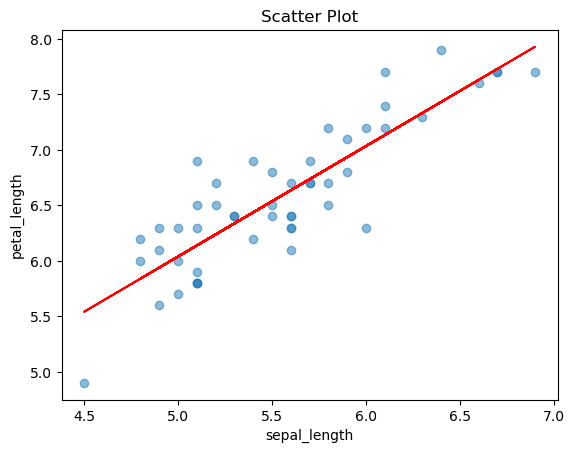

In [9]:
import matplotlib.pyplot as plt

plt.scatter(test.petal_length,test.sepal_length,alpha=.5)
plt.plot(test.petal_length, test.petal_length*0.9957 + 1.0597,color='red')

plt.title('Scatter Plot')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.show()

###### 4. test의 sepal_length(꽃받침 길이)를 종속변수(y)로 하고, 나머지 변수들을 독립변수로 하는 다중 회귀분석을 실시해 보세요. 모든 독립변수들이 95% 신뢰수준에서 통계적으로 유의한가요?


In [10]:
model_mlm = smf.ols(formula = 
                    'sepal_length ~ sepal_width + petal_length + petal_width',
                    data = test)
result_mlm = model_mlm.fit()
result_mlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     49.98
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           1.62e-14
Time:                        15:51:56   Log-Likelihood:                -11.577
No. Observations:                  50   AIC:                             31.15
Df Residuals:                      46   BIC:                             38.80
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6999      0.534      1.312      0.196      -0.374       1.774
sepal_width      0.3303      0.174      1.895      0.064      -0.021       0.681
petal_length     0.9455      0.091     10.422      0.000       0.763       1.128
petal_width     -0.1698      0.198     -0.857      0.396      -0.568       0.229
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.973   Jarque-Bera (JB):                0.039
Skew:                           0.032   Prob(JB):                        0.981
Kurtosis:                       2.879   Cond. No.                         80.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""